In [12]:
import numpy as np
import pandas as pd

from sklearn.ensemble  import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # ROC-curve, AUC

import matplotlib.pyplot as plt

# Не показывать FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('loanapp.csv')

In [6]:
df = df.dropna()

In [7]:
y = df['approve']
X = df.drop(columns=['approve','reject', 'action'])
# Разобьём выборку на обучающую и тестовую 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
clf_boost = GradientBoostingClassifier()
clf_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
clf_extratree = ExtraTreesClassifier()
clf_extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [15]:
clf_boost.score(X_test, y_test), clf_forest.score(X_test, y_test), clf_extratree.score(X_test, y_test)

(0.9185393258426966, 0.9157303370786517, 0.9269662921348315)

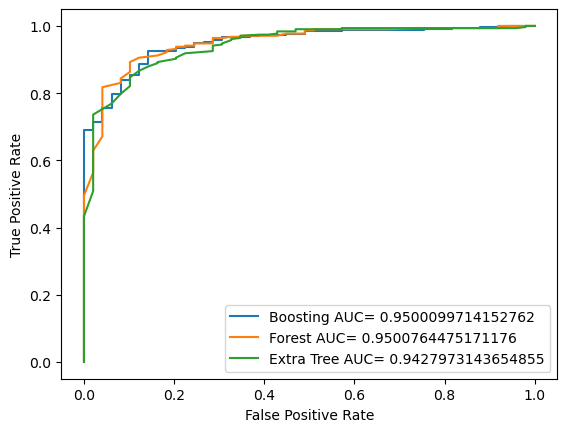

In [16]:
y_pred_prob = clf_boost.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_prob)

auc = metrics.roc_auc_score (y_test, y_pred_prob)

plt.plot (fpr,tpr,label="Boosting AUC= "+str(auc))

y_pred_prob = clf_forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_prob)

auc = metrics.roc_auc_score (y_test, y_pred_prob)

plt.plot (fpr,tpr,label="Forest AUC= "+str(auc))

y_pred_prob = clf_extratree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_prob)

auc = metrics.roc_auc_score (y_test, y_pred_prob)

plt.plot (fpr,tpr,label="Extra Tree AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()